## LAB 3 ARC ONLINE


#### Initializing:

In [1]:
from arcgis.gis import GIS
from arcgis import features
gis = GIS("home")

/opt/conda/lib/python3.6/site-packages/arcgis/gis/__init__.py:407: UserWarning: You are logged on as felza001_UMN with an administrator role, proceed with caution.
  self.users.me.username)


#### creating basemap of mpls, assigning it to variable

In [2]:
mpls = gis.map("Minneapolis, MN")
mpls

MapView(layout=Layout(height='400px', width='100%'))

#### Accessing Stops layer from my 'Content'

<Item title:"Driver_Stops" type:Feature Layer Collection owner:felza001_UMN>
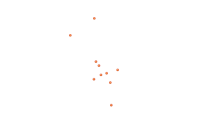

In [3]:
item = gis.content.get("9cab2043538a4fd18d39876a3e91c831")
driver_stops = item

driver_stops

#### Adding layer to 'mpls' map

In [4]:
mpls.add_layer(driver_stops)
mpls

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

#### Accessing Depot layer from my 'Content'

In [5]:
item2 = gis.content.get("d22e1ab98de84251900760689e82b491")
depot_loc = item2
depot_loc

<Item title:"Depot_Location" type:Feature Layer Collection owner:felza001_UMN>

#### Adding layer to 'mpls' map:

In [6]:
mpls.add_layer(depot_loc)
mpls

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [11]:
#features.use_proximity.plan_routes?

In [7]:
import datetime

## Using the Plan Routes function to create the optimal routes the two drivers can take, where they each are allocated 5 stops:

In [65]:
route_v2 = features.use_proximity.plan_routes(stops_layer=driver_stops,
                                              route_count=2,
                                              max_stops_per_route=5,
                                              route_start_time=datetime.datetime(2021,3,30,8,0),
                                              start_layer=depot_loc,
                                              return_to_start=True,
                                              end_layer=None,
                                              end_layer_route_id_field=None,
                                           travel_mode='Driving Time',
                                           stop_service_time=5,
                                           include_route_layers=True,
                                           output_name='lab_three_route')

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


<Item title:"lab_three_route" type:Feature Layer Collection owner:felza001_UMN>
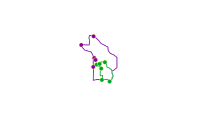

In [8]:
lab3routeitem = gis.content.get("474350a2dcf44b7d8aa755b349133d6f")
lab3_route = lab3routeitem
lab3_route

## Viewing newly created route layer on 'mpls' basemap:

In [9]:
mpls.add_layer(lab3_route)
mpls

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)